## 用 matplotlib 画三维图

### 应用 - 三维空间的点

[5.87641495 0.91938642 6.38896337 2.18561599 1.14935834 6.1929826
 3.6245996  6.94212925 8.75945966 5.05456727]


C:\Users\gchen\AppData\Local\Temp\ipykernel_1368\2239470813.py:15: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d') # 切换到当前画布绘图


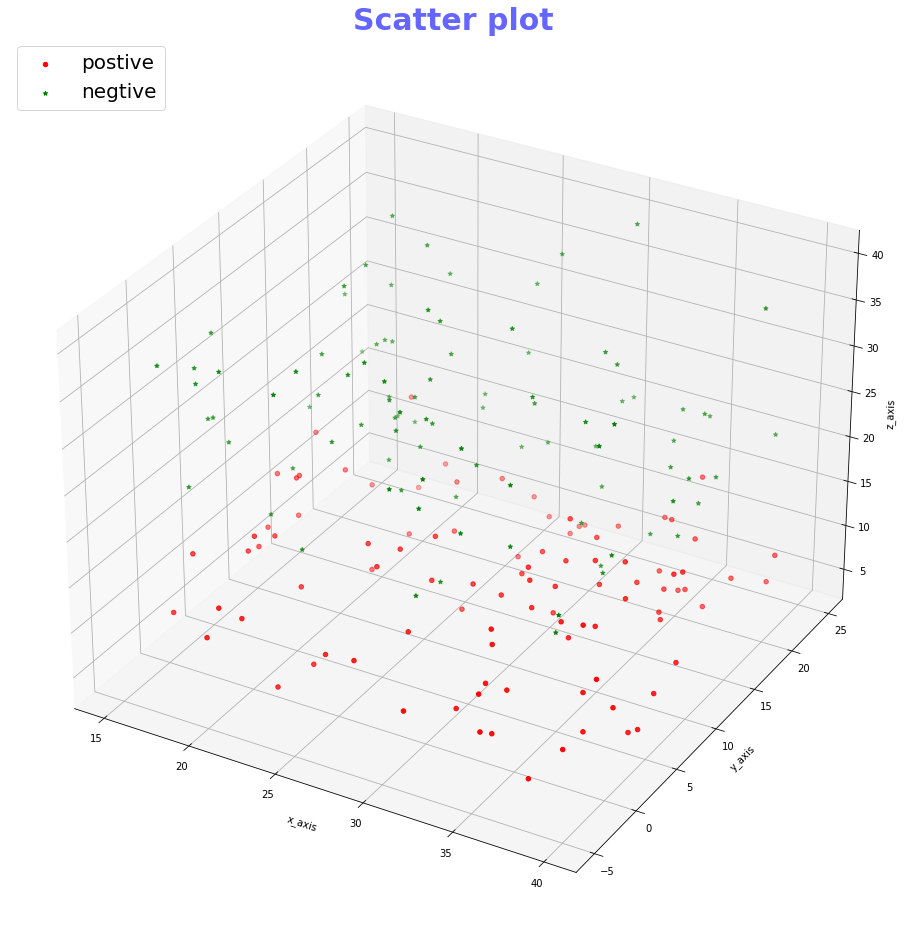

In [20]:
# 配置

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
mpl.rcParams['legend.fontsize'] = 20 # mpl模块载入的时候加载配置信息存储在rcParams变量中，rc_params_from_file()函数从文件加载配置信息
font = {
    'color': 'b',
    'style': 'oblique',
    'size': 20,
    'weight': 'bold'
}

fig = plt.figure(figsize=(16,20)) # 创建画布
ax = fig.gca(projection='3d') # 切换到当前画布绘图
ax.set_aspect('auto') # 设置坐标轴比例



#  ----- 应用 - 三维空间的点 -----

n = 100 # 生成点的数目

def randrange(n, vmin, vmax):
    """生成最小是vmin，最大是vmax的一共n个数字"""
    r = np.random.rand(n) # 生成 n 个 0-1 的数组
    return r * (vmax - vmin) + vmin

print(randrange(10,0,10))


# 绘图
for zlow, zhigh, c, m, l in [(4,15,'r','o','postive'),(13,40,'g','*','negtive')]:
    x = randrange(n, 15, 40)
    y = randrange(n, -5, 25)
    z = randrange(n, zlow, zhigh)

    # 绘图
    ax.scatter(x,y,z, c=c, marker=m, label=l)

# 绘图细节
ax.set_xlabel("x_axis")
ax.set_ylabel("y_axis")
ax.set_zlabel("z_axis")
ax.set_title("Scatter plot", alpha=0.6, color='b', size=30, weight='bold')
ax.legend(loc='upper left') # legend 的位置在左上


### 应用 - 三维空间的线

C:\Users\gchen\AppData\Local\Temp\ipykernel_1368\4005051171.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d') # 切换到当前画布绘图


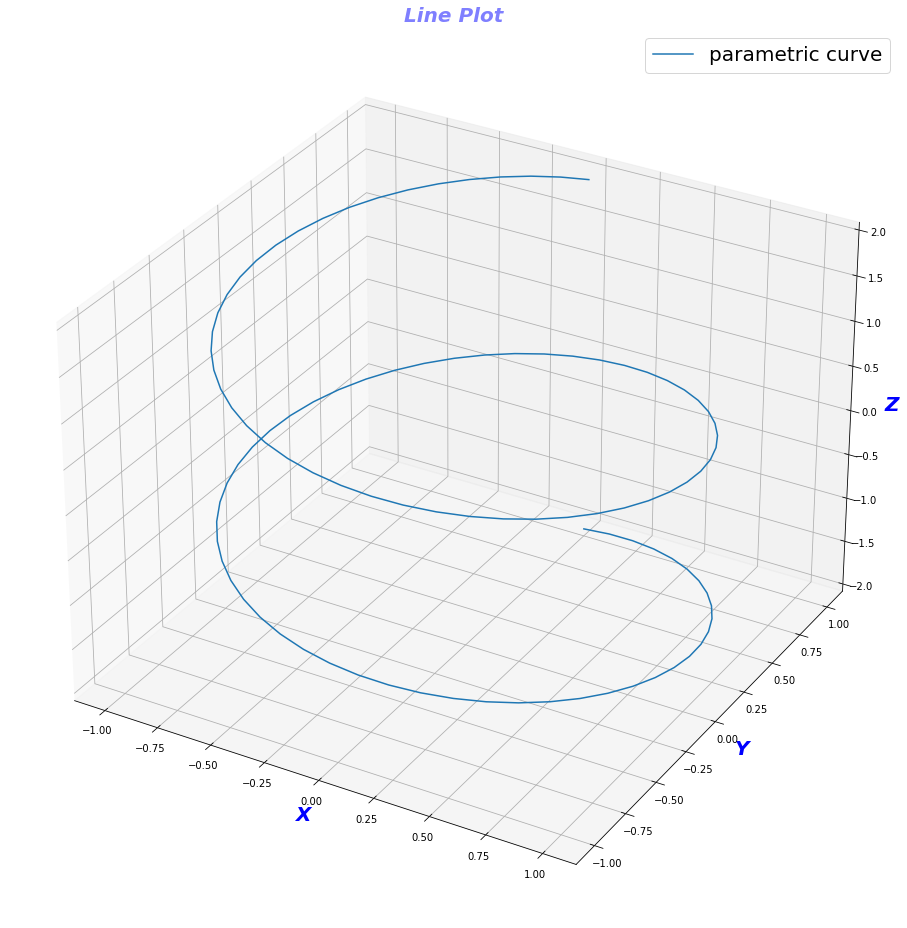

In [27]:
# 画板
fig = plt.figure(figsize=(16,20)) # 创建画布
ax = fig.gca(projection='3d') # 切换到当前画布绘图
ax.set_aspect('auto') # 设置坐标轴比例

# 设置参数
theta = np.linspace(-2 * np.pi, 2 * np.pi, 100)  # 生成等差数列，[-8π,8π]，个数为100
z = np.linspace(-2, 2, 100)
x = np.sin(theta)  
y = np.cos(theta)  

# 绘图
ax.plot(x, y, z, label='parametric curve')

# 调整参数
ax.set_xlabel("X", fontdict=font)
ax.set_ylabel("Y", fontdict=font)
ax.set_zlabel("Z", fontdict=font)
ax.set_title("Line Plot", alpha=0.5, fontdict=font) #alpha参数指透明度transparent
ax.legend(loc='upper right') #legend的位置可选：upper right/left/center,lower right/left/center,right,left,center,best等等
plt.show()

### 应用 - 三维空间的面

In [33]:
# meshgrid 的引入

x = np.linspace(1,5,5)
print(x)
y = np.linspace(0,4,5)
print(y)

np.meshgrid(x,y)   #格点矩阵,原来的x行向量向下复制len(y)次，形成len(y)*len(x)的矩阵，即为新的x矩阵；原来的y列向量向右复制len(x)次，形成len(y)*len(x)的矩阵，即为新的y矩阵；新的x矩阵和新的y矩阵shape相同

[1. 2. 3. 4. 5.]
[0. 1. 2. 3. 4.]


[array([[1., 2., 3., 4., 5.],
        [1., 2., 3., 4., 5.],
        [1., 2., 3., 4., 5.],
        [1., 2., 3., 4., 5.],
        [1., 2., 3., 4., 5.]]),
 array([[0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1.],
        [2., 2., 2., 2., 2.],
        [3., 3., 3., 3., 3.],
        [4., 4., 4., 4., 4.]])]

C:\Users\gchen\AppData\Local\Temp\ipykernel_1368\2818072850.py:5: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d') # 切换到当前画布绘图


Text(0.5, 0.92, 'Surface plot')

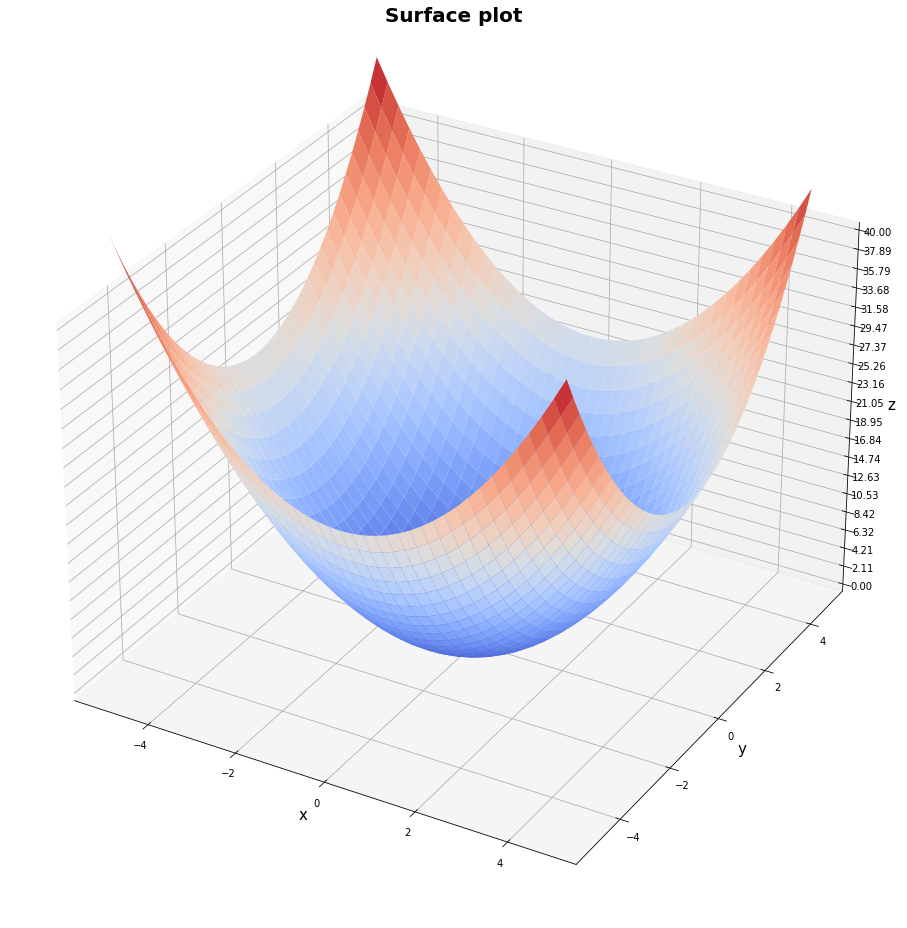

In [55]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
# 设置画布
fig = plt.figure(figsize=(16,20)) # 创建画布
ax = fig.gca(projection='3d') # 切换到当前画布绘图
ax.set_aspect('auto') # 设置坐标轴比例

# 调整参数
x = np.arange(-5, 5, 0.25)    #生成[-5,5]间隔0.25的数列，间隔越小，曲面越平滑
y = np.arange(-5, 5, 0.25)
x, y = np.meshgrid(x, y)
z = x**2 + y**2

# 绘图
ax.plot_surface(x, y, z, cmap=cm.coolwarm)  # cmap: color map

# 绘图细节
    #自定义z轴
ax.set_zlim(0,40)
ax.zaxis.set_major_locator(LinearLocator(20))  # z轴网格线的疏密，刻度的疏密，20表示刻度的个数
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))  # 将z的value字符串转为float，保留2位小数

    #设置坐标轴的label和标题
ax.set_xlabel('x',size=15)
ax.set_ylabel('y',size=15)
ax.set_zlabel('z',size=15)
ax.set_title("Surface plot", weight='bold', size=20)